In [54]:
import xarray as xr
# import xesmf as xe
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import statsmodels.api as sm
import cartopy
import cartopy.util
import cartopy.crs as ccrs
import glob
import sys
import datetime

In [3]:
run ../util/setupConsole

In [143]:

cesm2_hist_tx_phsoff = xr.open_dataset('clm5/clm50_cesm201R_1deg_GSWP3V1_phsoff_hist.clm2.h0.TREFMXAV.185001-201412.nc')
clm5_hist_tx_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_noirr = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoIrrig_hist.clm2.h0.TREFMXAV.185001-201012.nc')
clm5_hist_tx_nolulcc = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoLULCC_hist.clm2.h0.TREFMXAV.185001-201012.nc')

cesm2_hist_tn_phsoff = xr.open_dataset('clm5/clm50_cesm201R_1deg_GSWP3V1_phsoff_hist.clm2.h0.TREFMNAV.185001-201412.nc')
clm5_hist_tn_iso = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_nocrop = xr.open_dataset('clm5/clm50_r267_1deg_GSWP3V1_iso_hist_nocrop_transientfix.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_noirr = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoIrrig_hist.clm2.h0.TREFMNAV.185001-201012.nc')
clm5_hist_tn_nolulcc = xr.open_dataset('clm5/clm50_r270_1deg_GSWP3V1_NoLULCC_hist.clm2.h0.TREFMNAV.185001-201012.nc')

In [144]:
cesm2_hist_tx_phsoff.load()
clm5_hist_tx_iso.load()
clm5_hist_tx_nocrop.load()
clm5_hist_tx_noirr.load()
clm5_hist_tx_nolulcc.load()

cesm2_hist_tn_phsoff.load()
clm5_hist_tn_iso.load()
clm5_hist_tn_nocrop.load()
clm5_hist_tn_noirr.load()
clm5_hist_tn_nolulcc.load()

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, time: 1932)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lon           (lon) float32 0.0 1.25 2.5 3.75 ... 355.0 356.25 357.5 358.75
  * lat           (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
  * time          (time) object 1850-02-01 00:00:00 ... 2011-01-01 00:00:00
Dimensions without coordinates: hist_interval
Data variables:
    area          (lat, lon) float32 29.948368 29.948368 29.948368 ... nan nan
    landfrac      (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... nan nan nan nan nan
    landmask      (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    pftmask       (lat, lon) float64 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    nbedrock      (lat, lon) float64 20.0 20.0 20.0 20.0 ... 0.0 0.0 0.0 0.0
    ZSOI          (levgrnd, lat, lon) float32 0.01 0.01 0.01 ... nan nan nan
    DZSOI         (levgrnd, lat, lon) float32 0.02 0.02 0.02 ... nan nan nan
    WATSAT        (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    SUCSAT        (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    BSW           (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    HKSAT         (levgrnd, lat, lon) float32 nan nan nan nan ... nan nan nan
    ZLAKE         (levlak, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    DZLAKE        (levlak, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    mcdate        (time) float64 1.85e+07 1.85e+07 ... 2.01e+07 2.011e+07
    mcsec         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mdcur         (time) float64 31.0 59.0 90.0 ... 5.87e+04 5.873e+04 5.876e+04
    mscur         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nstep         (time) float64 1.488e+03 2.832e+03 ... 2.819e+06 2.821e+06
    time_bounds   (time, hist_interval) object 1849-12-31 23:30:00 ... 2011-01-01 00:00:00
    date_written  (time) object b'12/25/17' b'12/25/17' ... b'12/26/17'
    time_written  (time) object b'13:18:48{@\x97\xce{@\x97\xce' ... b'16:14:32\xff\xff\xd8\xf1\xff\xff\xd8\xf1'
    TREFMNAV      (time, lat, lon) float32 242.85622 242.85622 ... nan nan
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 12/25/17 13:18:48
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    username:                                  oleson
    version:                                   unknown
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   clm50_r270_1deg_GSWP3V1_NoLULC...
    Surface_dataset:                           surfdata_0.9x1.25_78pfts_CMIP6...
    Initial_conditions_dataset:                finidat_interp_dest.nc
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    ltype_vegetated_or_bare_soil:              1
    ltype_crop:                                2
    ltype_UNUSED:                              3
    ltype_landice_multiple_elevation_classes:  4
    ltype_deep_lake:                           5
    ltype_wetland:                             6
    ltype_urban_tbd:                           7
    ltype_urban_hd:                            8
    ltype_urban_md:                            9
    ctype_vegetated_or_bare_soil:              1
    ctype_crop:                                2
    ctype_crop_noncompete:                     2*100

In [145]:
lat_vals = clm5_hist_tx_iso.lat.values
lon_vals = clm5_hist_tx_iso.lon.values

In [148]:
tx_grid_hist = np.full([clm5_hist_tx_iso.lat.shape[0], clm5_hist_tx_iso.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_nocrop = np.full([clm5_hist_tx_nocrop.lat.shape[0], clm5_hist_tx_nocrop.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_noirr = np.full([clm5_hist_tx_nocrop.lat.shape[0], clm5_hist_tx_nocrop.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_nolulcc = np.full([clm5_hist_tx_nolulcc.lat.shape[0], clm5_hist_tx_nolulcc.lon.shape[0], 61, 12], np.nan)
tx_grid_hist_phsoff = np.full([cesm2_hist_tx_phsoff.lat.shape[0], cesm2_hist_tx_phsoff.lon.shape[0], 61, 12], np.nan)


tn_grid_hist = np.full([clm5_hist_tn_iso.lat.shape[0], clm5_hist_tn_iso.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_nocrop = np.full([clm5_hist_tn_nocrop.lat.shape[0], clm5_hist_tn_nocrop.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_noirr = np.full([clm5_hist_tn_noirr.lat.shape[0], clm5_hist_tn_noirr.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_nolulcc = np.full([clm5_hist_tn_nolulcc.lat.shape[0], clm5_hist_tn_nolulcc.lon.shape[0], 61, 12], np.nan)
tn_grid_hist_phsoff = np.full([cesm2_hist_tn_phsoff.lat.shape[0], cesm2_hist_tn_phsoff.lon.shape[0], 61, 12], np.nan)

In [149]:
for m in range(1,12+1):
    time_ind_hist = np.where((clm5_hist_tx_iso['time.month'].values == m) & (clm5_hist_tx_iso['time.year'].values>=1950))[0]
    time_ind_hist = time_ind_hist[0:61]
    
    tx_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_iso.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_nocrop.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_noirr[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_noirr.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    tx_grid_hist_nolulcc[:,:,:,m-1] = np.moveaxis(clm5_hist_tx_nolulcc.TREFMXAV.values[time_ind_hist,:,:], 0, 2)
    
    tn_grid_hist[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_iso.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_nocrop[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_nocrop.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_noirr[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_noirr.TREFMNAV.values[time_ind_hist,:,:], 0, 2)
    tn_grid_hist_nolulcc[:,:,:,m-1] = np.moveaxis(clm5_hist_tn_nolulcc.TREFMNAV.values[time_ind_hist,:,:], 0, 2)

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


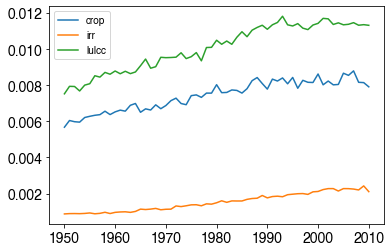

In [151]:
tx_crop_effect = np.nanmean(tx_grid_hist_nocrop,axis=3) - np.nanmean(tx_grid_hist, axis=3)
tx_irr_effect = np.nanmean(tx_grid_hist_noirr,axis=3) - np.nanmean(tx_grid_hist, axis=3)
tx_lulcc_effect = np.nanmean(tx_grid_hist_nolulcc,axis=3) - np.nanmean(tx_grid_hist, axis=3)
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tx_crop_effect, axis=0), axis=0), label='crop')
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tx_irr_effect, axis=0), axis=0), label='irr')
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tx_lulcc_effect, axis=0), axis=0), label='lulcc')
plt.legend()

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


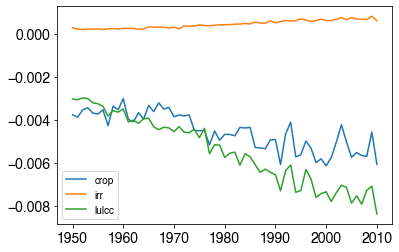

In [152]:
tn_crop_effect = np.nanmean(tn_grid_hist_nocrop,axis=3) - np.nanmean(tn_grid_hist, axis=3)
tn_irr_effect = np.nanmean(tn_grid_hist_noirr,axis=3) - np.nanmean(tn_grid_hist, axis=3)
tn_lulcc_effect = np.nanmean(tn_grid_hist_nolulcc,axis=3) - np.nanmean(tn_grid_hist, axis=3)
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tn_crop_effect, axis=0), axis=0), label='crop')
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tn_irr_effect, axis=0), axis=0), label='irr')
plt.plot(range(1950, 1950+61), np.nanmean(np.nanmean(tn_lulcc_effect, axis=0), axis=0), label='lulcc')
plt.legend()

/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/dartfs-hpc/rc/home/2/f003ps2/.conda/envs/ecoffel/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


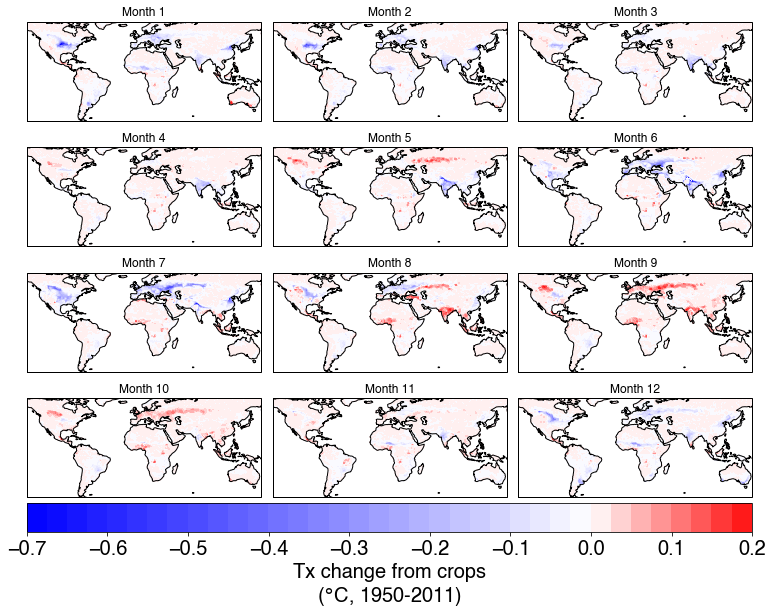

In [130]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tx_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tx_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.7
        v2 = .21
        vstep = .025
        vlabelstep = .1

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tx change from crops\n($\degree$C, 1950-2011)', fontsize=20)

In [ ]:
fig = plt.figure(figsize=(13,11))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.05, hspace=0)

m = 0
for row in range(4):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col], projection=ccrs.PlateCarree())
        ax.set_extent([-140, 155, -55, 70], crs=ccrs.PlateCarree())
        ax.coastlines()

        data, plot_lon_vals = cartopy.util.add_cyclic_point(np.nanmean(tn_grid_hist[:,:,:,m], axis=2) - \
                                                    np.nanmean(tx_grid_hist_nocrop[:,:,:,m], axis=2),\
                                                    coord=lon_vals)
        
        v1 = -.7
        v2 = .21
        vstep = .025
        vlabelstep = .1

        midnorm = MidpointNormalize(vmin=v1, vcenter=0, vmax=v2)
        cmap = plt.cm.get_cmap('bwr')
        c = ax.contourf(plot_lon_vals, lat_vals, data, \
                         cmap=cmap, norm=midnorm, levels=np.arange(v1,v2,vstep), transform=ccrs.PlateCarree())

        # plt.contourf(lon, lat, gddTrendSig, levels=[0, 0.05], colors='none', hatches=['/', ''])
        # ax.add_feature(cartopy.feature.STATES.with_scale('10m'), edgecolor='#222222')
        scmap = plt.cm.ScalarMappable(cmap=cmap, norm=midnorm)
        scmap.set_array([])
        
        ax.set_title('Month %d'%(m+1))
#         ax.set_aspect('auto')
        m += 1

# cax, kw = mpl.colorbar.make_axes()
# cbar = fig.colorbar(sm, ax=[ax1, ax2], orientation="horizontal", ticks = np.arange(6), pad=0.05,, extend="max")

cb = fig.colorbar(scmap, ax=plt.gcf().get_axes(), ticks=np.arange(v1, v2, vlabelstep), 
             boundaries=np.arange(v1, v2, vstep), orientation='horizontal', use_gridspec=True,
             pad=0.01, aspect=25, shrink=1)
cb.ax.tick_params(labelsize=20)
cb.set_label('Tx change from crops\n($\degree$C, 1950-2011)', fontsize=20)

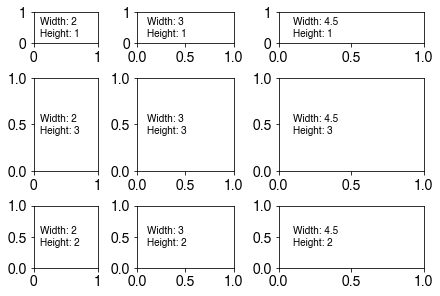

In [108]:
fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 4.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')